### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Creating dataframe

In [2]:
# inserting the dataset using read_csv and creating dataframe "df"

data = pd.read_csv("diabetes.csv")

In [3]:
# creating a copy of dataset using copy() function

df = data.copy()

In [4]:
# to get the top 05 rows of dataset head() is used.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From above results and also from the offical data description we can notice following things.

The dataset has the following features (columns):

*   Pregnancies: Number of times pregnant

*   Glucose: Plasma glucose concentration, 2 hours in an oral glucose tolerance test

*   BloodPressure: Diastolic blood pressure ( mmHg )

*   SkinThickness: Triceps skin fold thickness ( mm )

*   Insulin: 2-Hour serum insulin ( mu(U/ml ))

*   BMI: Body mass index (weight in  kg  / height in  meter square )

*   DiabetesPedigreeFunction: It indicates the function which scores likelihood of diabetes based on family history

*   Age: Age (in years)

*   Outcome: Whether patient is diagnosed with Diabetes (0 for No, 1 for Yes)


Here, the Outcome is our target variable. We clearly see that apart from the property **Outcome** all other properties are numerical and continuous in nature.




In [6]:
# Checking description using describe()

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Things to Observe





The features "Glucose," "Blood Pressure," "Skin Thickness," "Insulin," and "BMI" all have a minimum value of 0. This is illogical because these values can't be zero. Therefore, in our circumstance, this can be safely referred to as "missing data". The 0-valued rows must either be removed or replaced with the mean or median value for that feature. 





* Check for the Null Values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

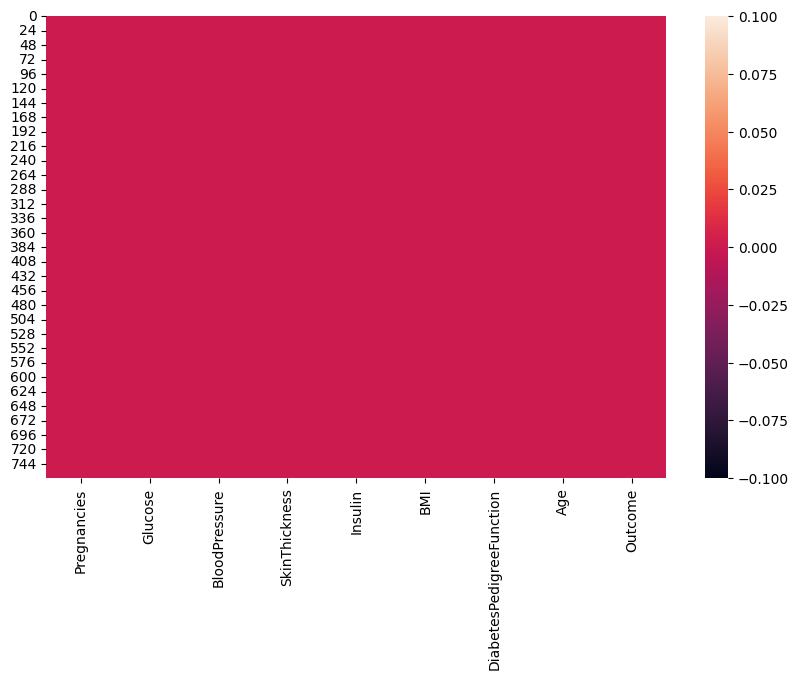

In [8]:
plt.subplots(figsize=(10, 6))

sns.heatmap(df.isnull())

 * Good! There are no null values in our dataset.

#### Analysis of Pregnancies

As observed, **Pregnancies** is a **Quantitative** feature. There are many plots to analyse these type of data. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

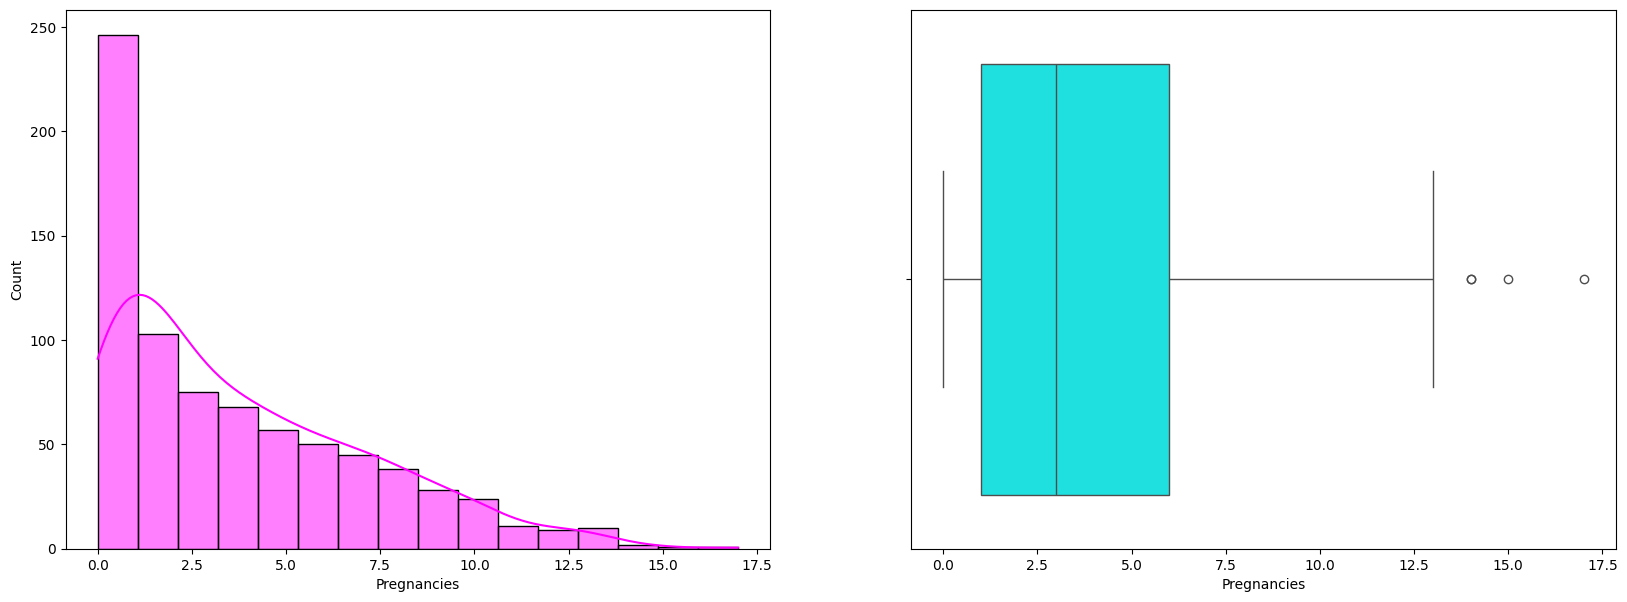

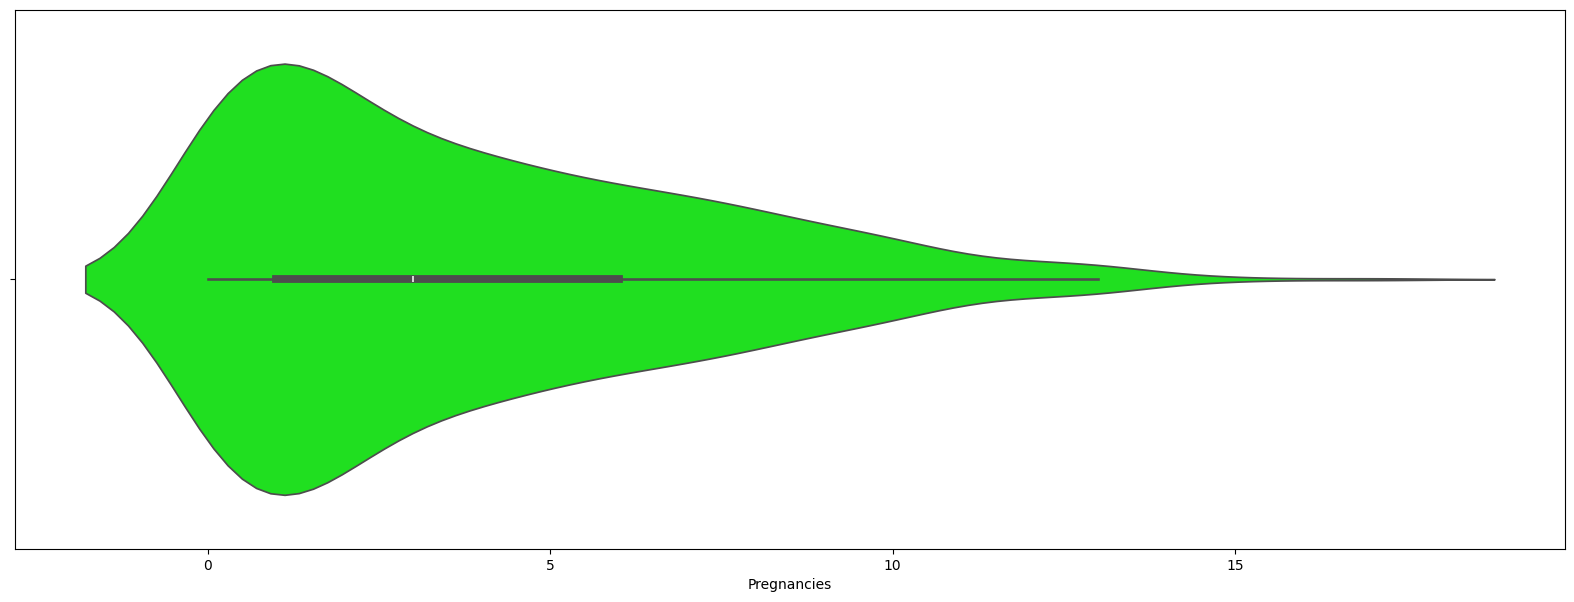

In [9]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0],color = 'magenta')
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1],color = 'aqua')

sns.violinplot(data=df, x="Pregnancies", ax=ax2,color = 'lime')

plt.show()

In [10]:
print("Median of Pregnancies: ", df["Pregnancies"].median())
print("Maximum of Pregnancies: ", df["Pregnancies"].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [11]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

From the above analysis we observe that:

- Most patients had 0, 1 or 2 pregnancies.
- Median value of **Pregnancies** is **3**.
- Also, patients had upto **17** pregnancies!

There are 3 outliers on the boxplot. But, let's not remove them for now.

#### Analysis of Outcome (Target Variable)

A Count plot and a Pie chart will be two useful plots to analyse the **Outcome** column as it is a categorical feature. Usefulness in the sense, both the plots will allow us to observe the distribution of each category in the feature.

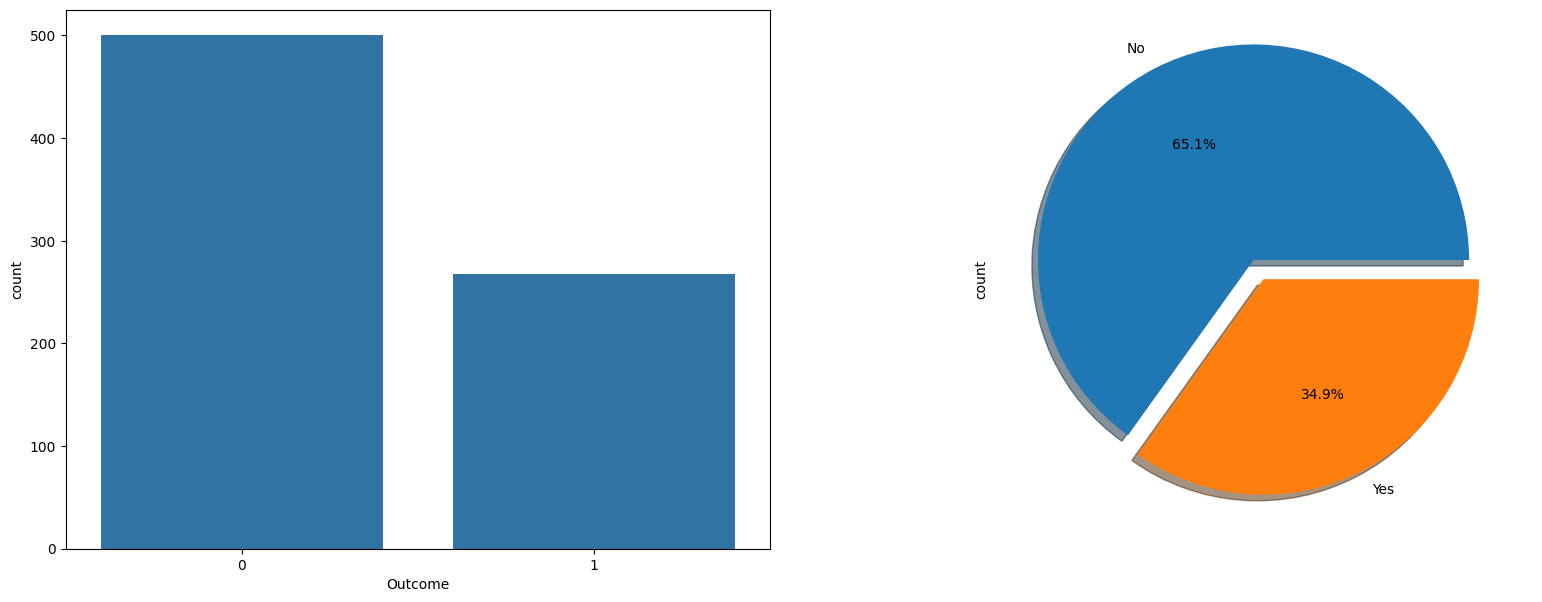

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x="Outcome", ax=ax[0])
df["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()

We observe from the above plot that:

- **65.1% patients in the dataset do NOT have diabetes.**
- **34.9% patients in the dataset has diabetes.**

#### Analysis of Glucose

**Glucose** is a **Quantitative** feature. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

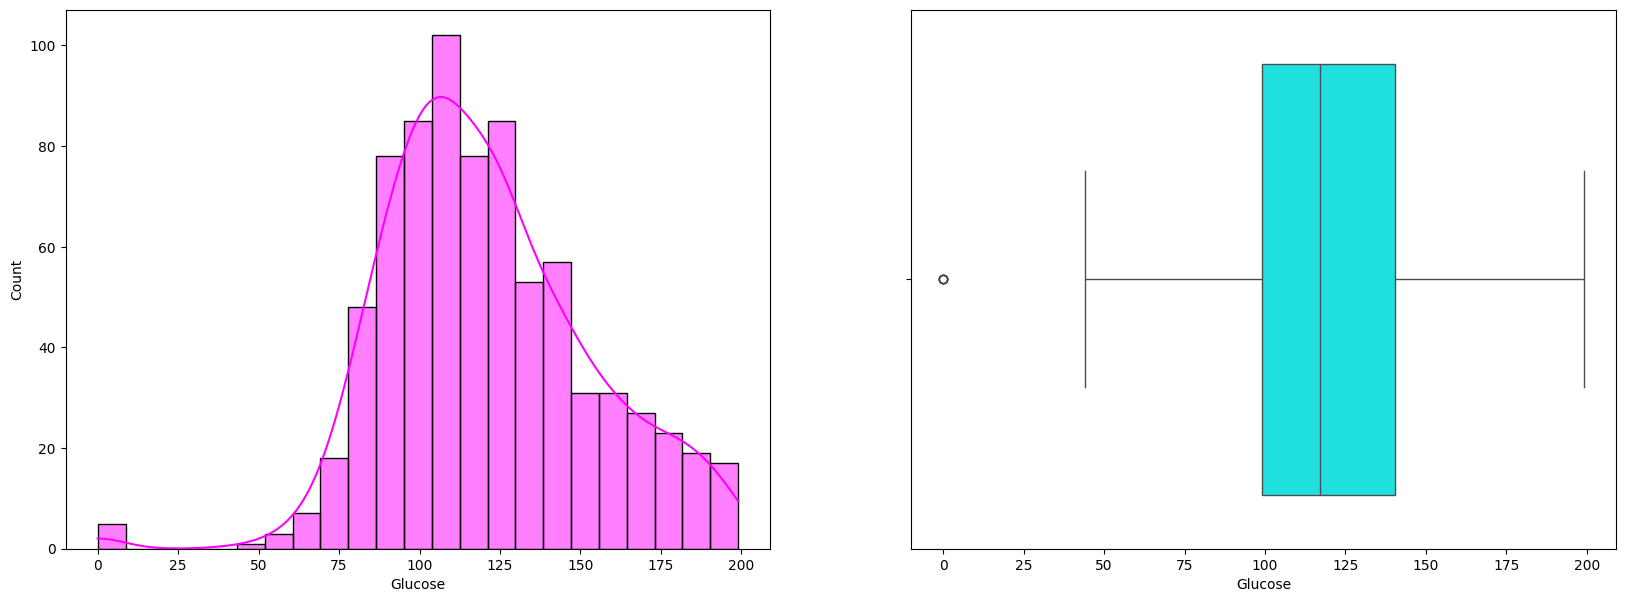

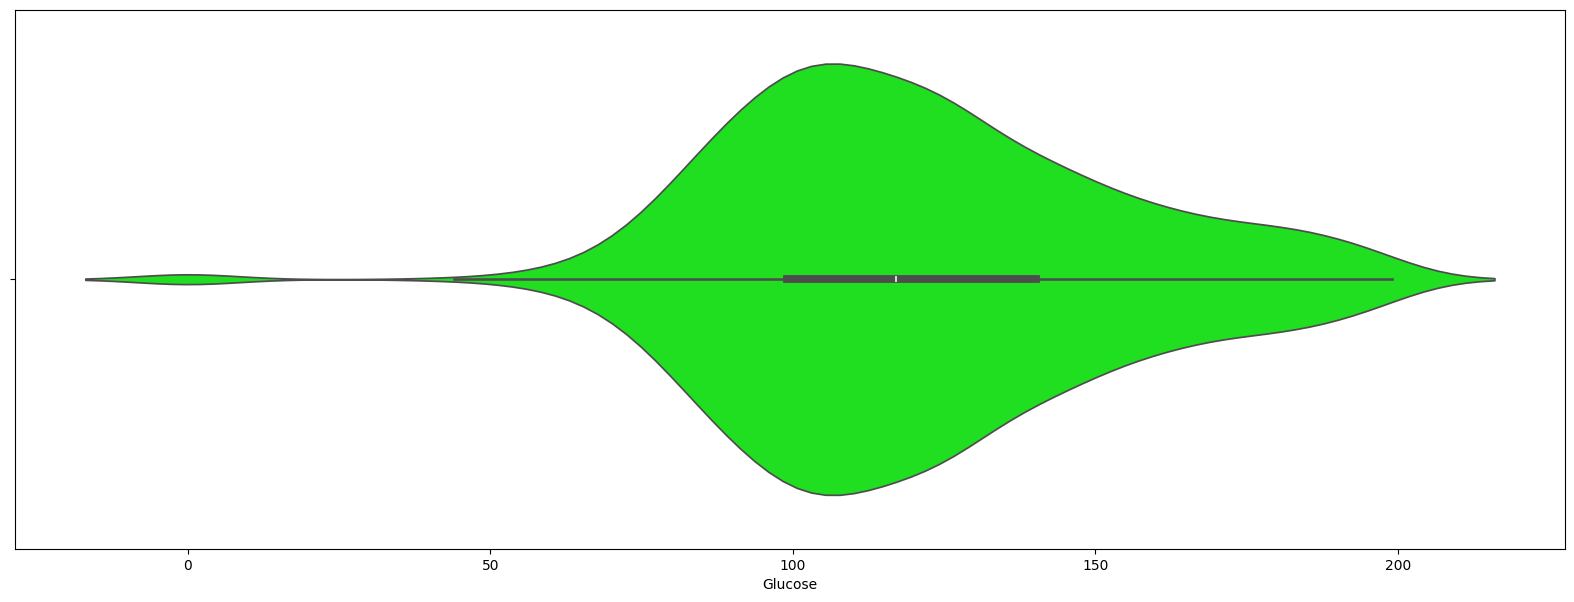

In [13]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))
fig4, ax4 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax3[0], color = "magenta")
sns.boxplot(data=df, x="Glucose", ax=ax3[1], color = "aqua")

sns.violinplot(data=df, x="Glucose", ax=ax4, color = "lime")

plt.show()

In [14]:
print("Median of Glucose: ", df["Glucose"].median())
print("Maximum of Glucose: ", df["Glucose"].max())
print("Mean of Glucose: ", df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [15]:
print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])

Rows with Glucose value of 0:  5


We observe that:

- Median (117.0) and mean (120.8) of **Glucose** lie very close to each other i.e. the distribution is more or less **symmetric and uniform**.
- As seen from the box plot, an outlier lies on 0-value, which I talked about earlier.
- There are **5 rows** with `Glucose` value as 0. This is not logical, so we need to keep this in mind.

#### Analysis of Blood Pressure

**BloodPressure** is a **Quantitative** feature. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

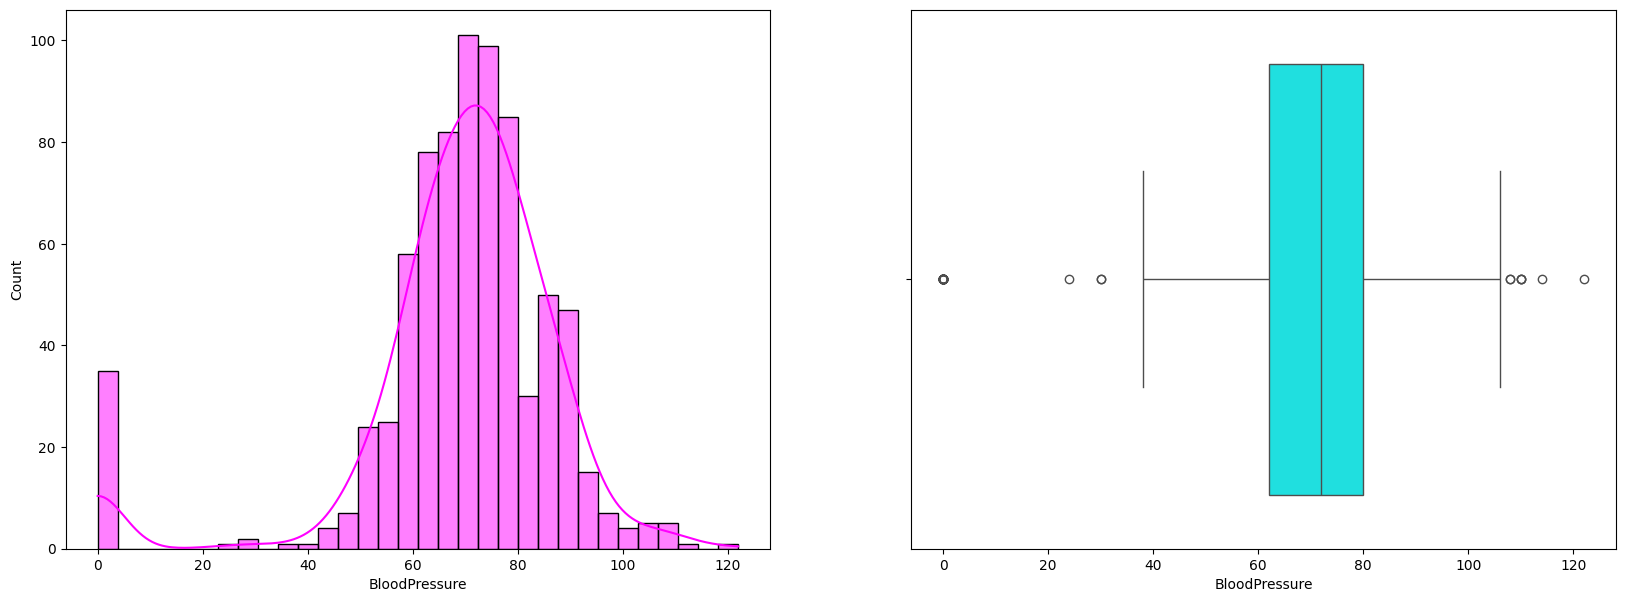

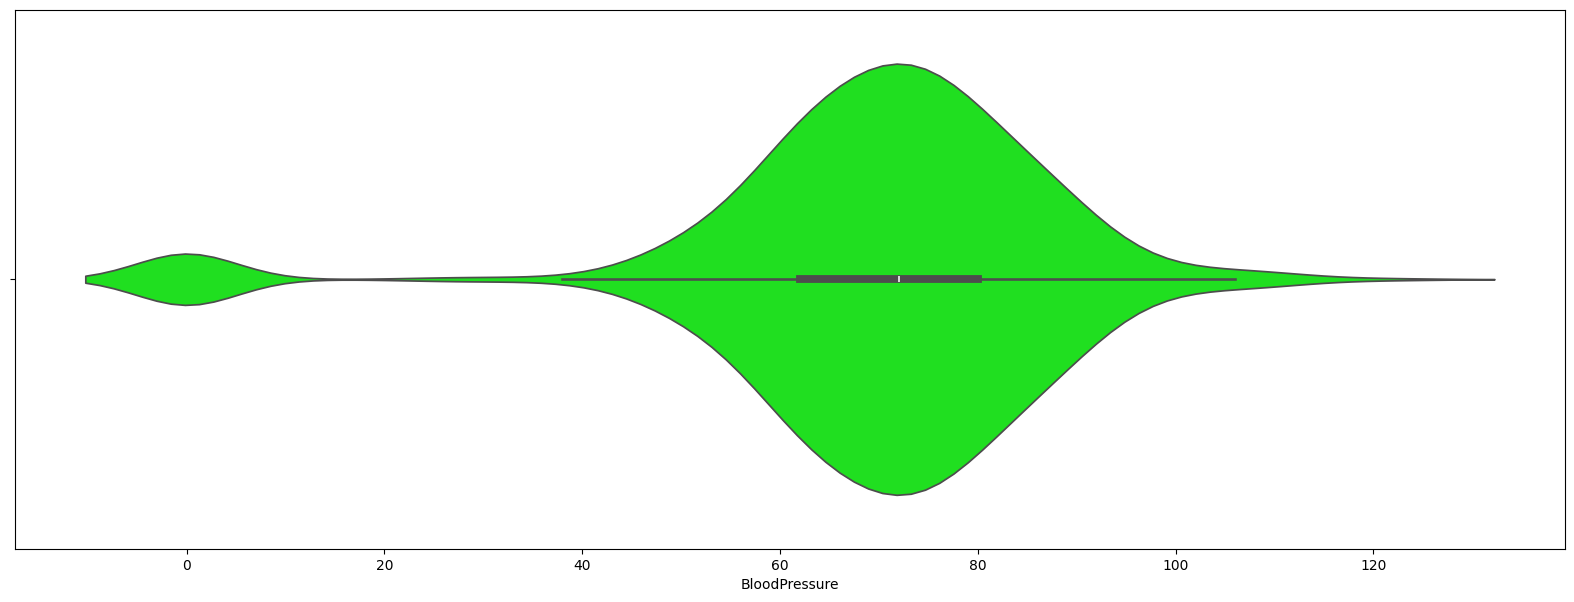

In [16]:
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))
fig6, ax6 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BloodPressure",kde=True,  ax=ax5[0],color = 'magenta')
sns.boxplot(data=df, x="BloodPressure", ax=ax5[1], color = 'aqua')

sns.violinplot(data=df, x="BloodPressure", ax=ax6, color = 'lime')

plt.show()

In [17]:
print("Median of Blood Pressure: ", df["BloodPressure"].median())
print("Maximum of Blood Pressure: ", df["BloodPressure"].max())
print("Mean of Pressure: ", df["BloodPressure"].mean())

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Pressure:  69.10546875


In [18]:
print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])

Rows with BloodPressure value of 0:  35


We observe that:
​
- Median (72.0) and mean (69.1) of **BloodPressure** lie very close to each other i.e. the distribution is more or less **symmetric and uniform**.
- As seen from the box plot and violin plot, some outliers lie on 0-value, which I talked about earlier.
- There are **35 rows** with `BloodPressure` value as 0. This is not logical.

#### Analysis of Insulin

Plotting Histogram, Box plot and Violin plot for 'Insulin'.

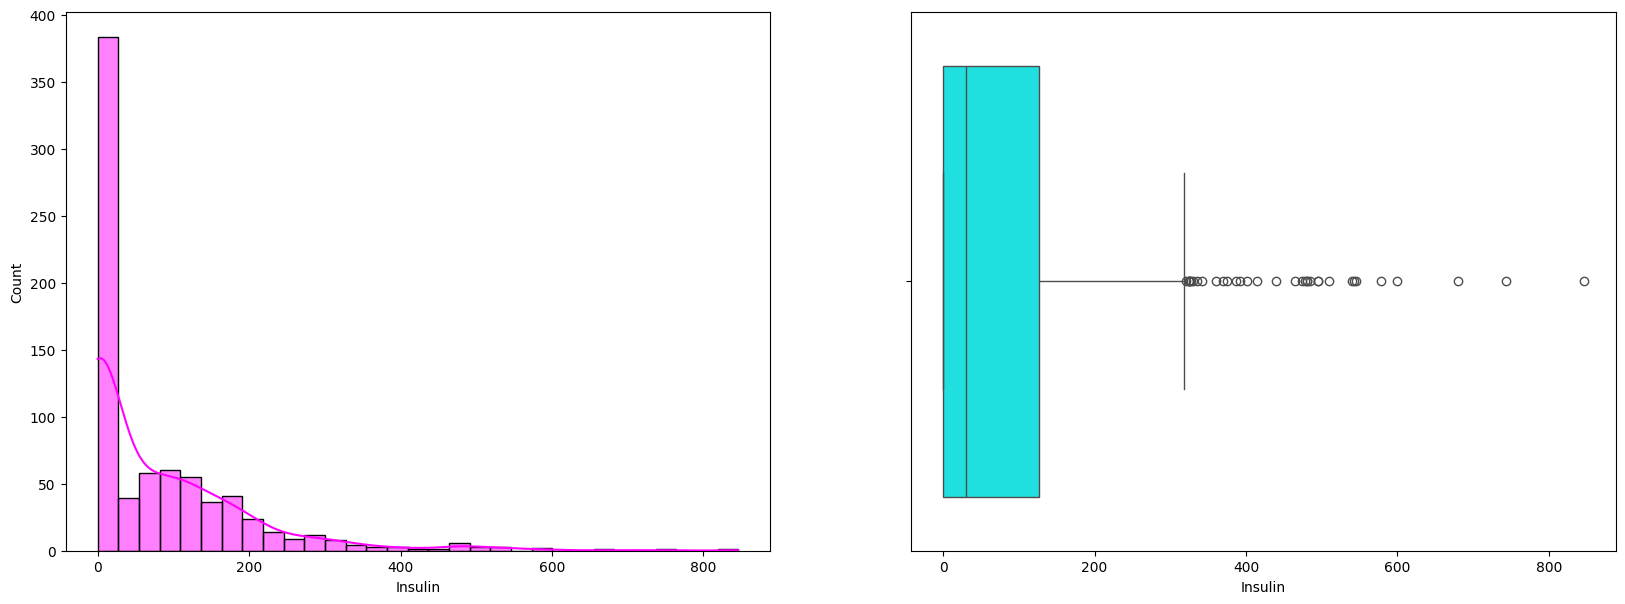

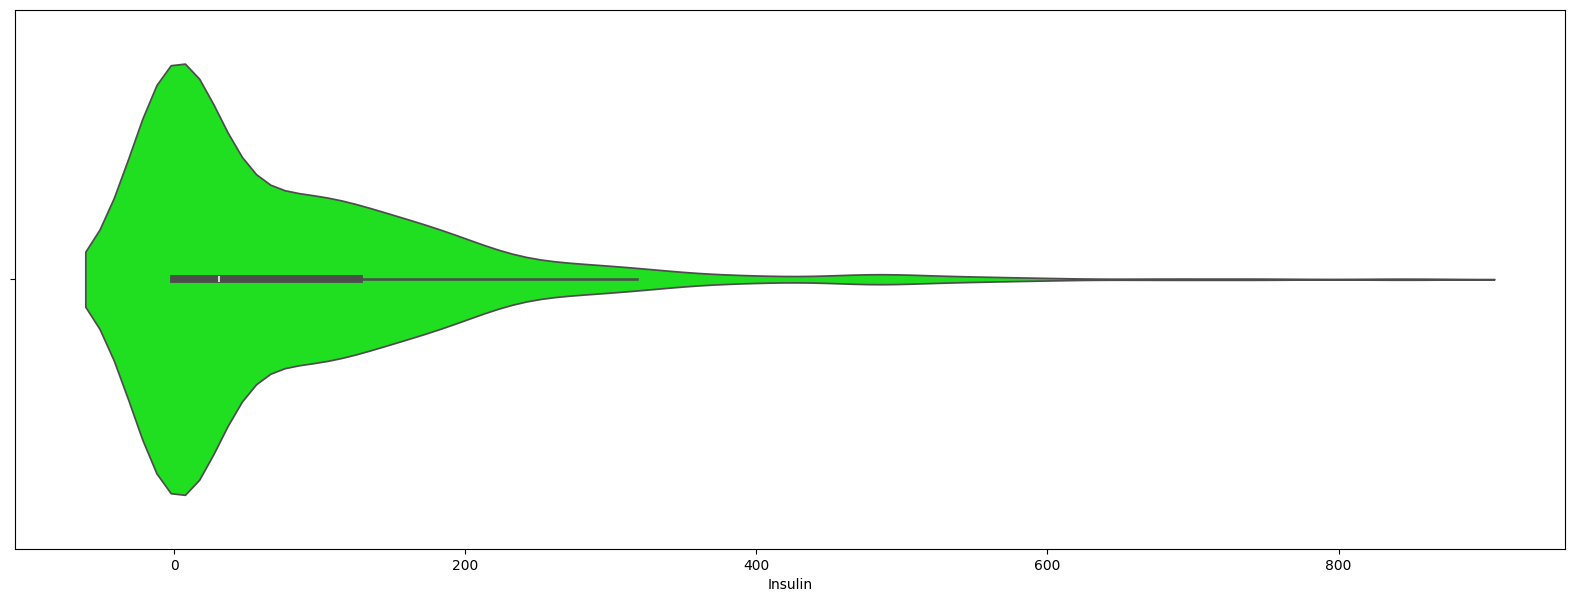

In [19]:
fig7, ax7 = plt.subplots(1, 2, figsize=(20, 7))
fig8, ax8 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax7[0],color = 'magenta')
sns.boxplot(data=df, x="Insulin", ax=ax7[1],color = 'aqua')

sns.violinplot(data=df, x="Insulin", ax=ax8,color = 'lime')

plt.show()

In [20]:
print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])

Rows with Insulin value of 0:  374


The plots for **Insulin** are highly skewed. Also, the 0-value logical error is the most for this feature. **374 out of 768** instances have value of **Insulin** as 0.

#### Analysis of BMI

Plotting Histogram, Box plot and Violin plot for *BMI*.

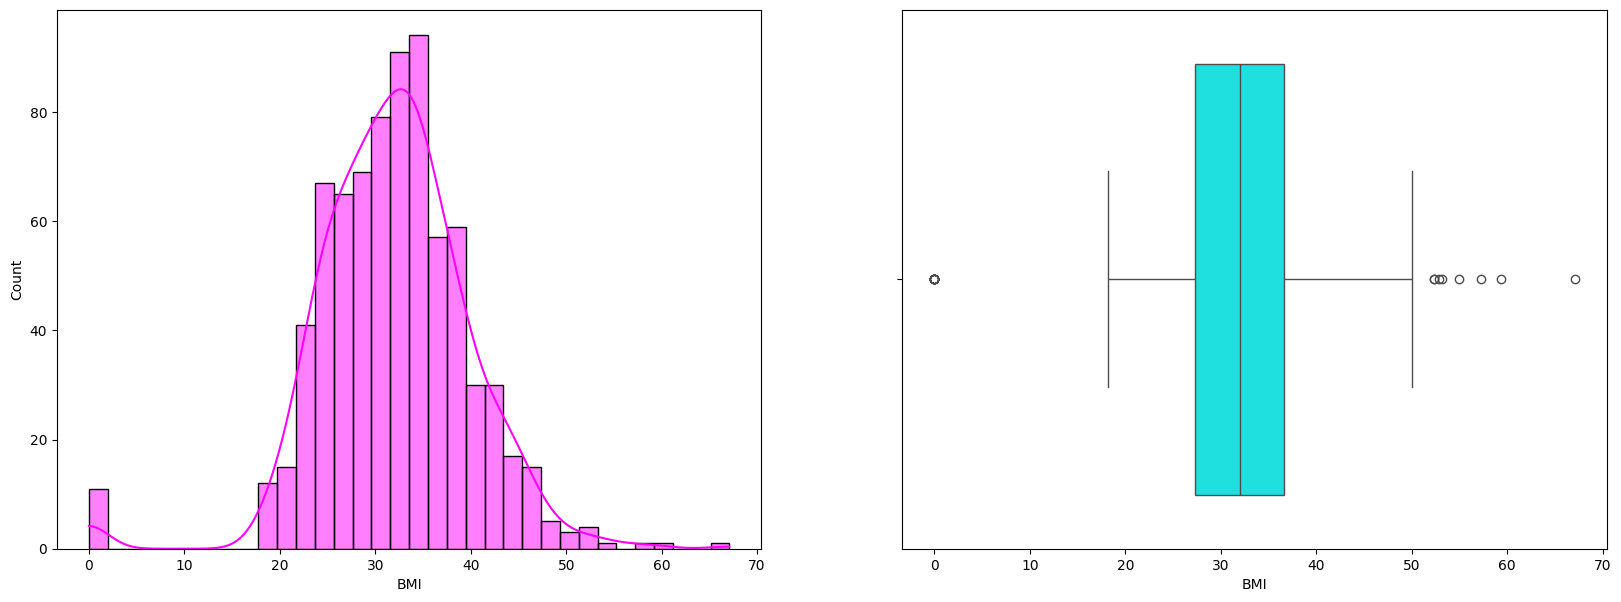

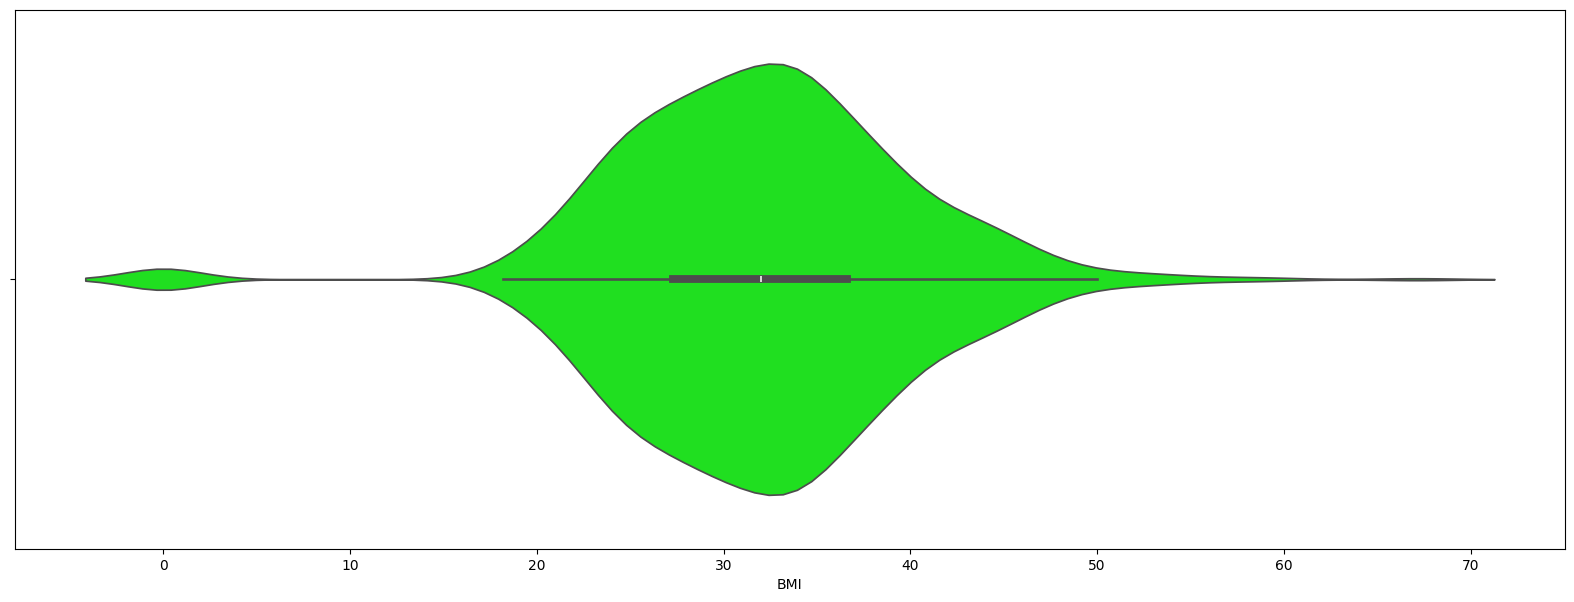

In [21]:
fig9, ax9 = plt.subplots(1, 2, figsize=(20, 7))
fig10, ax10 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax9[0], color = 'magenta')
sns.boxplot(data=df, x="BMI", ax=ax9[1], color = 'aqua')

sns.violinplot(data=df, x="BMI", ax=ax10 , color = 'lime')

plt.show()

In [22]:
print("Median of BMI: ", df["BMI"].median())
print("Maximum of BMI: ", df["BMI"].max())
print("Mean of BMI: ", df["BMI"].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998


In [23]:
print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])

Rows with BMI value of 0:  11


We observe that:

- Median (32.0) and Mean (31.9) of **BMI** are very close to each other. Thus, the distribution is more or less **symmetric and uniform**
- Maximum BMI is 67.1
- There are **11 rows** with **BMI** value as 0

#### Analysis of Diabetes Pedigree Function

**DiabetesPedigreeFunction** is a **continuous and quantitative** variable.

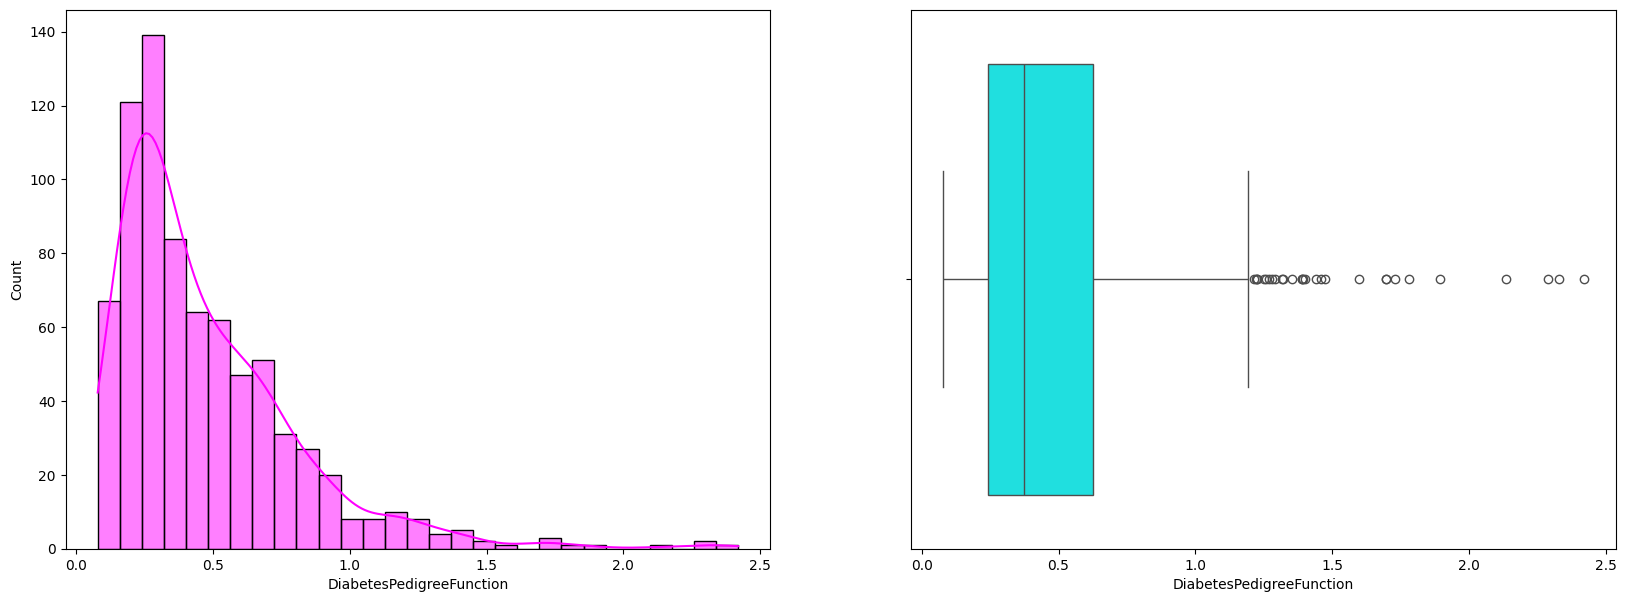

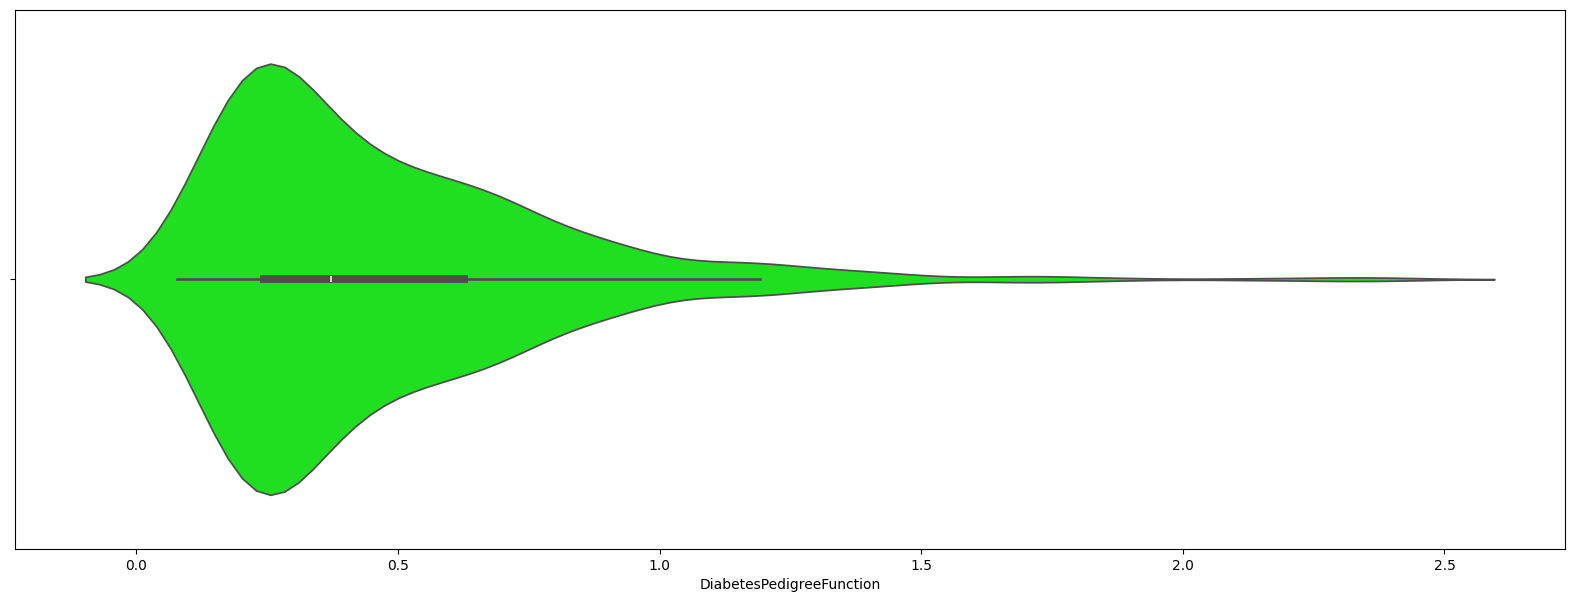

In [24]:
fig11, ax11 = plt.subplots(1, 2, figsize=(20, 7))
fig12, ax12 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax11[0],color = 'magenta')
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax11[1],color = 'aqua')

sns.violinplot(data=df, x="DiabetesPedigreeFunction", ax=ax12,color = 'lime')

plt.show()

In [25]:
print("Median of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].median())
print("Maximum of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].max())
print("Mean of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


We observe that:

- The histogram is higly skewed on the left side.
- There are many outliers in the Box plot.
- Violin plot distribution is dense in the interval **0.0 - 1.0**

#### Analysis of Age

Plotting Histogram, Box plot and Violin plots for **Age**.

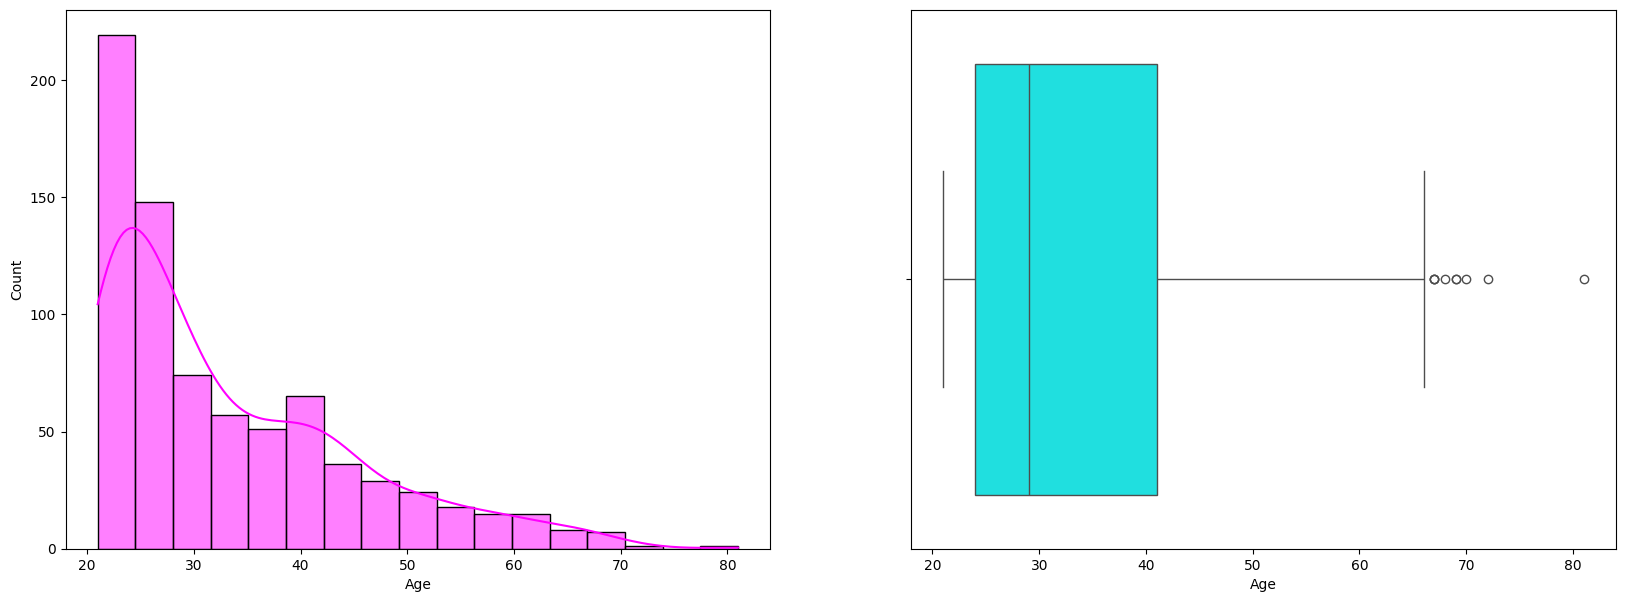

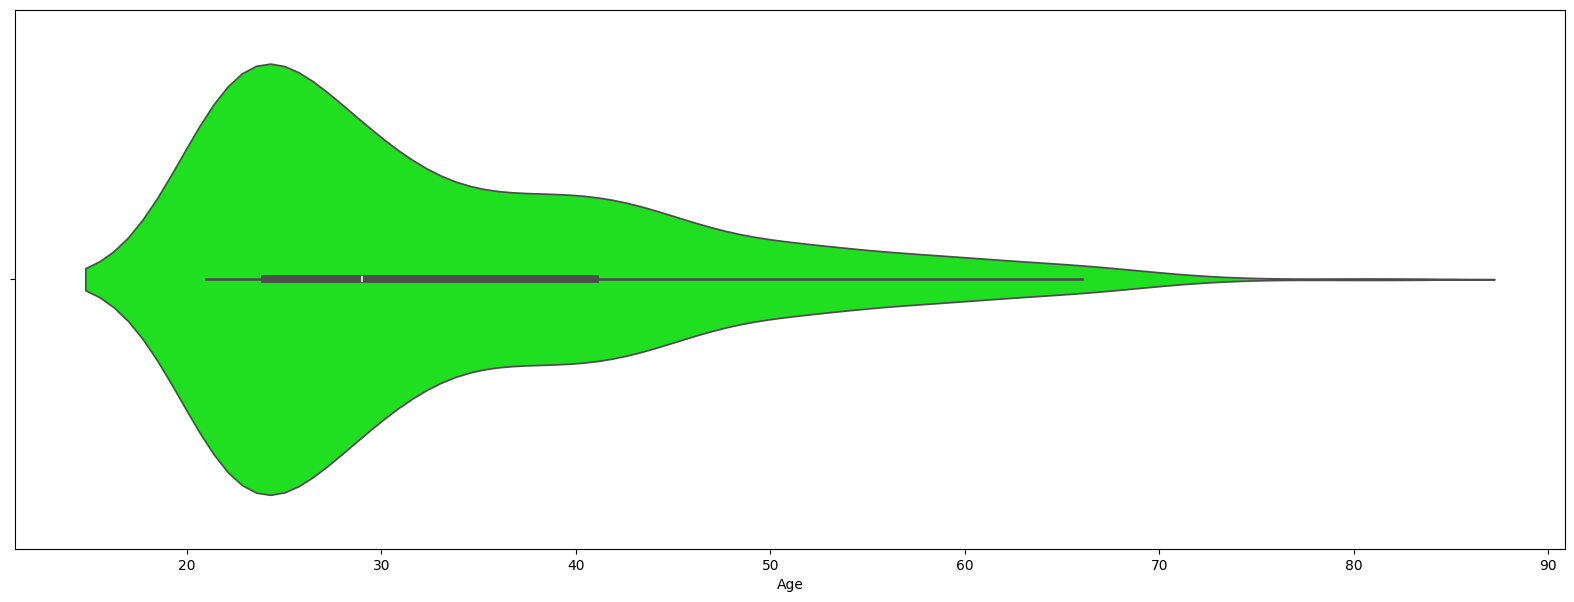

In [26]:
fig13, ax13 = plt.subplots(1, 2, figsize=(20, 7))
fig14, ax14 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Age", kde=True, ax=ax13[0],color = 'magenta')
sns.boxplot(data=df, x="Age", ax=ax13[1],color = 'aqua')

sns.violinplot(data=df, x="Age", ax=ax14,color = 'lime')

plt.show()

In [27]:
print("Median of Age: ", df["Age"].median())
print("Maximum of Age: ", df["Age"].max())
print("Mean of Age: ", df["Age"].mean())

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664


We again observe that:

- The distribution of Age is skewed on the left side.
- There are some outliers in the Box plot for Age.

### Multivariate Analysis

#### Analysis of Glucose and Outcome

Since **Glucose** is a continuous feature, we plot a histogram with its hue based on **Outcome**.

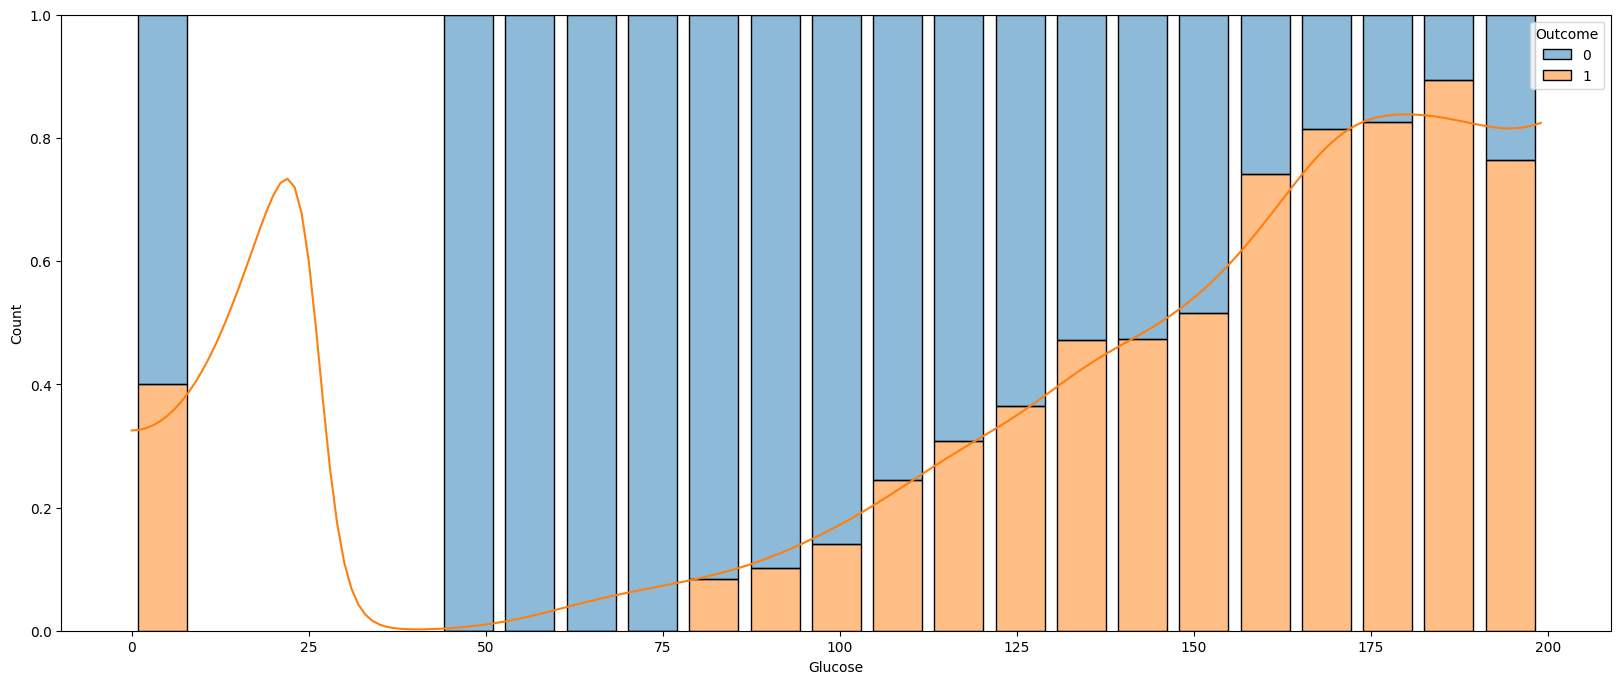

In [28]:
fig15, ax15 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax15)
plt.show()

From the above plot, we see a **positive linear correlation**.

- As the value of **Glucose** increases, the count of patients having diabetes increases i.e. value of **Outcome** as 1, increases.
- Also, after the **Glucose** value of **125**, there is a steady increase in the number of patients having **Outcome** of 1.
- Note, when **Glucose** value is 0, it means the measurement is missing. We need to fill that values with the *mean* or *median* and then it will make sense.

So, there is a significant amount of *positive* linear correlation.

#### Analysis of BloodPressure and Outcome

**BloodPressure** is continuous and **Outcome** is binary feature. So, plotting a histogram for **BloodPressure** with its hue based on **Outcome**.

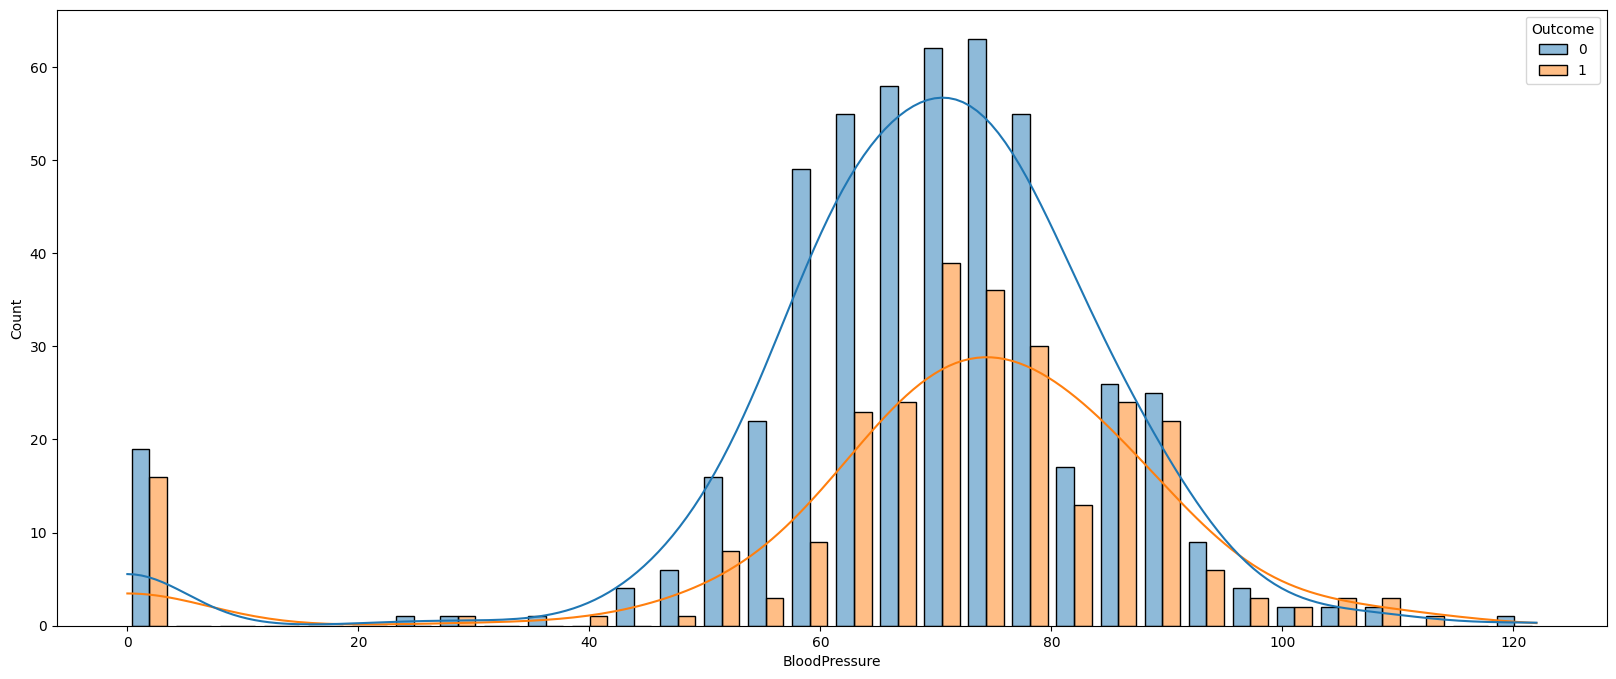

In [29]:
fig16, ax16 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BloodPressure", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax16,)
plt.show()

We observe that, **Outcome** and **BloodPressure** do **NOT** have a positive or negative linear correlation. The value of **Outcome** do not increase linearly as value of **BloodPressure** increases.

However, for **BloodPressure** values greater than 82, count of patients with **Outcome** as 1, is more.

#### Analysis of BMI and Outcome

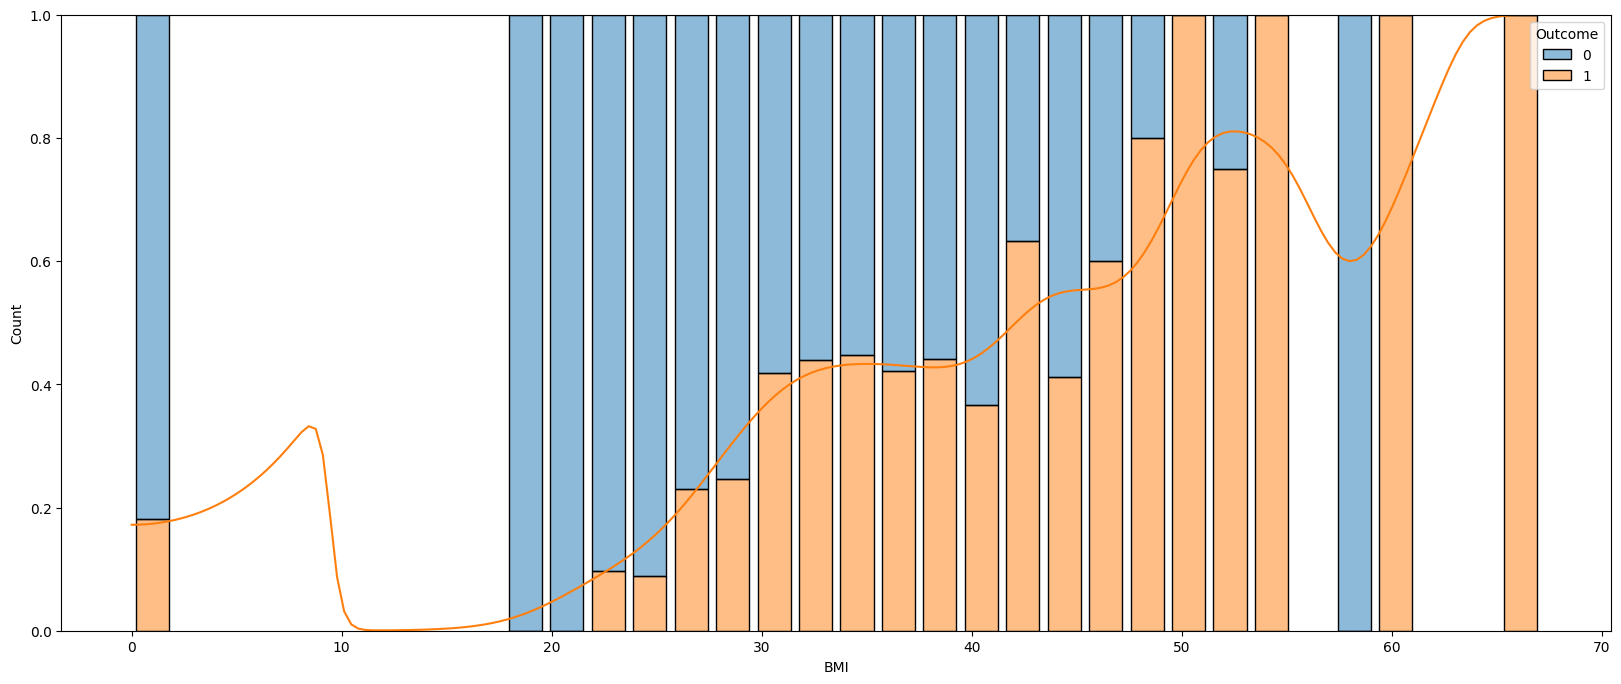

In [30]:
fig17, ax17 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax17)
plt.show()

From the above plot, a **positive linear correlation** is evident for **BMI**.

#### Analysis of Age and Outcome

**Age** is continuous so plotting a histogram with hue based on **Outcome**.

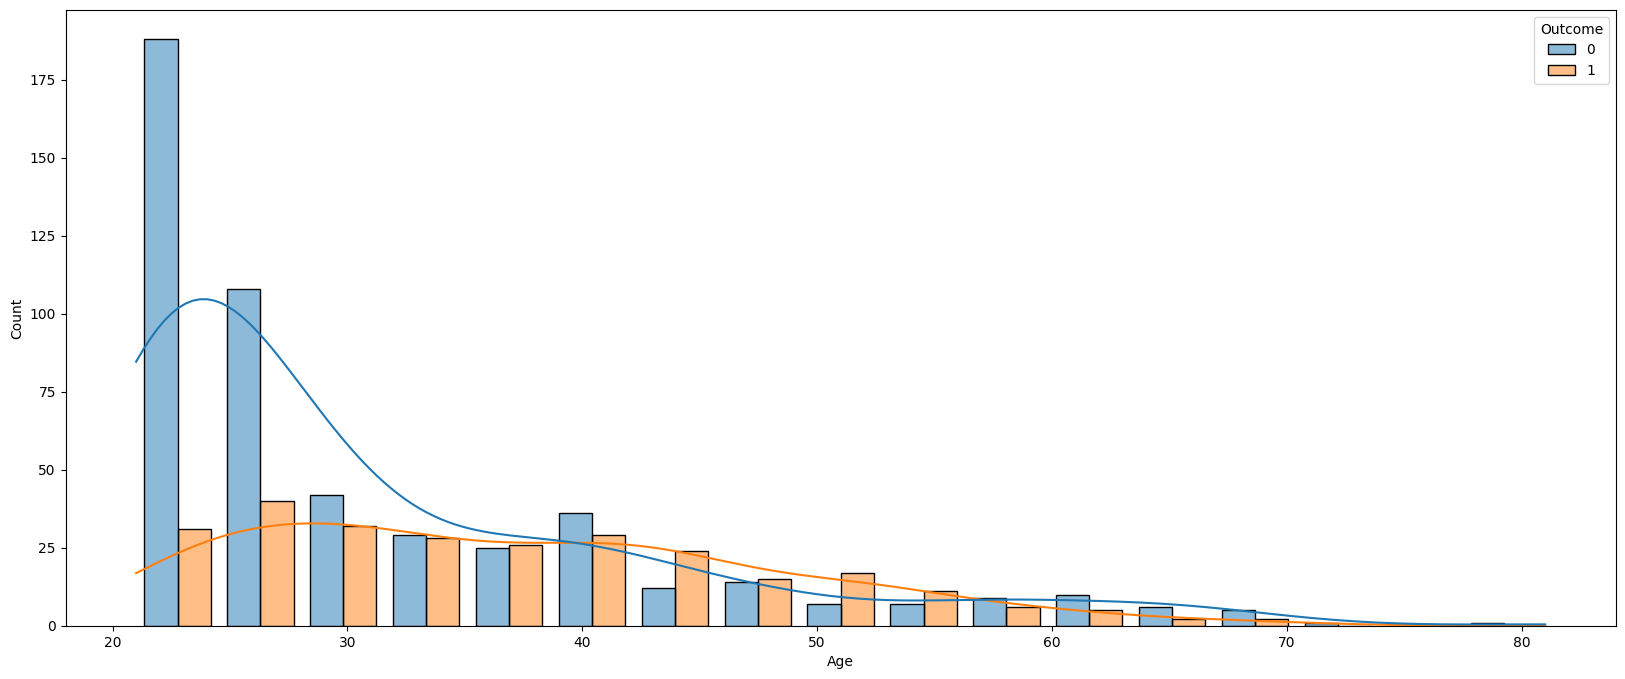

In [31]:
fig18, ax18 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax18)
plt.show()

For **Age** greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people **NOT** having diabetes. But, it does not hold true for ages like **60+**, somehow.

There is *some* positive linear correlation though.

#### Analysis of Pregnancies and Outcome

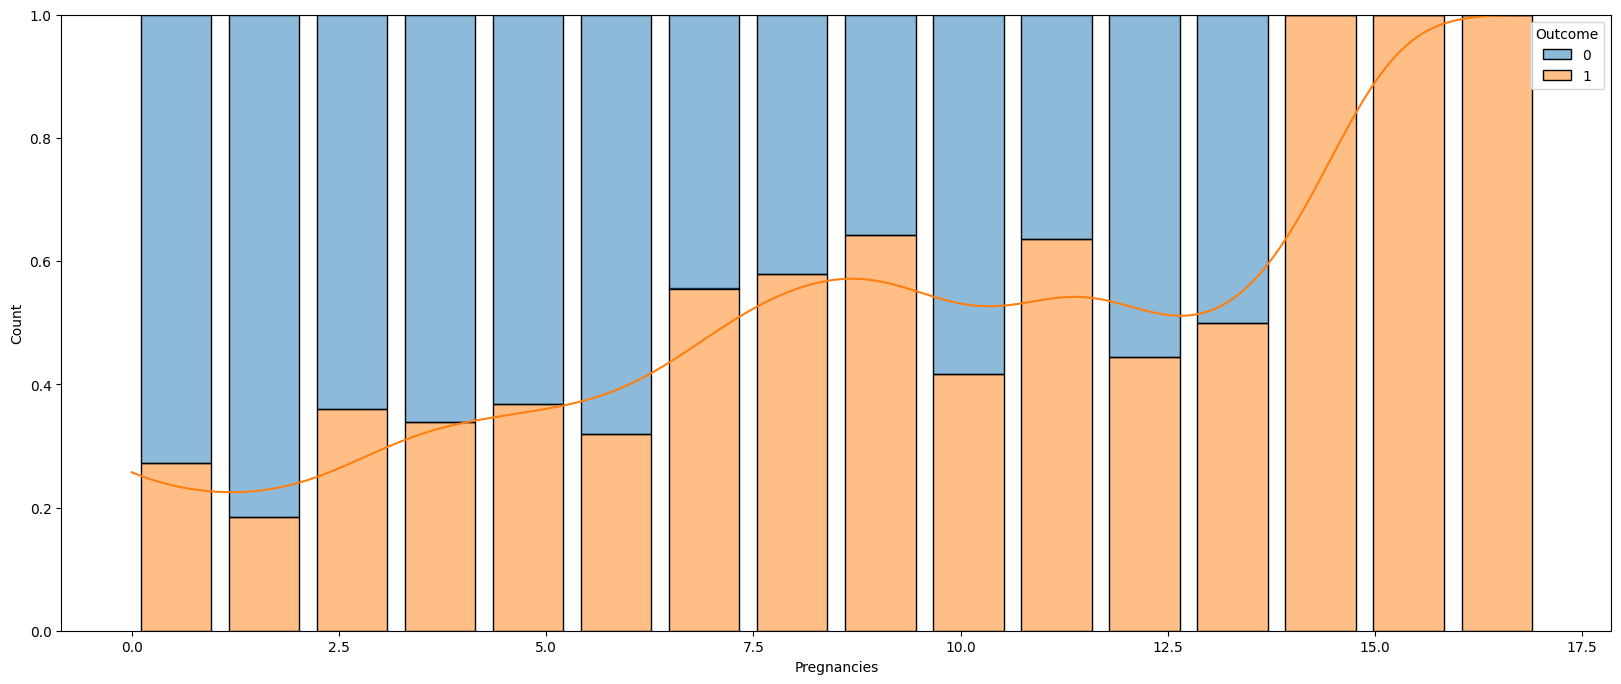

In [32]:
fig19, ax19 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()

There is *some* positive linear correlation of **Pregnancies** with **Outcome**.

### Analyzing Correlations

Let us plot a **heatmap** of the correlation matrix of different features.

In [33]:
# The 2D correlation matrix
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


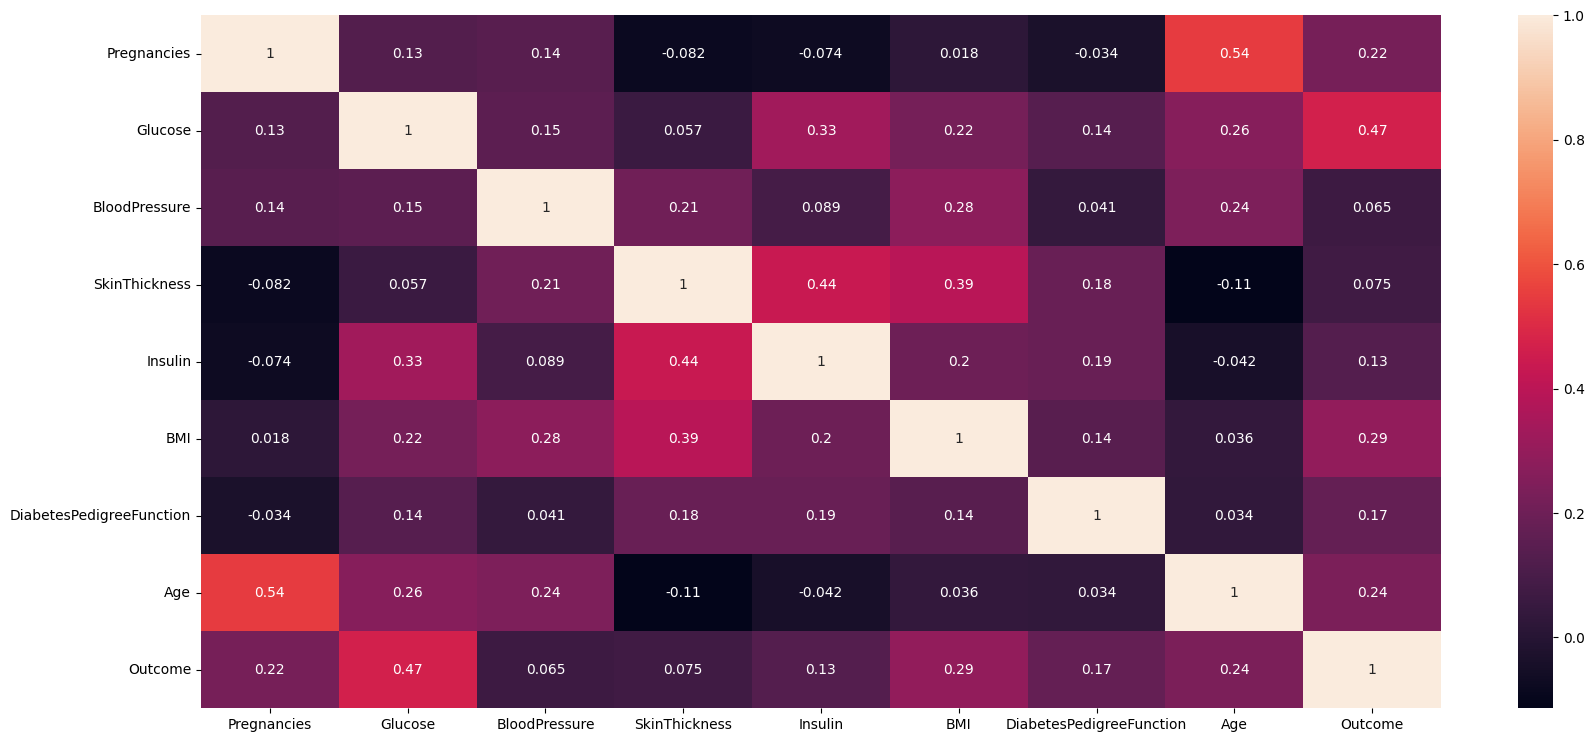

In [34]:
# Plotting the heatmap of corr

fig20, ax20 = plt.subplots(figsize=(20, 9))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

In [35]:
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

We observe that:

- **Glucose** has the maximum positive linear correlation with **Outcome**, which is logical.
- **BloodPressure** has the lowest positive linear correlation with **Outcome**.
- No feature has a negative linear correlation with **Outcome**.

In [36]:
## Splitting input and output data as X and y resp.

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [37]:
## Checking shape of the input columns
X.shape

(768, 8)

In [38]:
## Checking shape of the output column
y.shape

(768,)

### Train Test Split

In [39]:
## Importing train test split
from sklearn.model_selection import train_test_split

In [40]:
## Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=34)

In [41]:
## Checking shape of train input data
X_train.shape

(576, 8)

In [42]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
221,2,158,90,0,0,31.6,0.805,66
294,0,161,50,0,0,21.9,0.254,65
420,1,119,88,41,170,45.3,0.507,26
579,2,197,70,99,0,34.7,0.575,62
741,3,102,44,20,94,30.8,0.400,26
...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.4,0.698,27
758,1,106,76,0,0,37.5,0.197,26
490,2,83,65,28,66,36.8,0.629,24
122,2,107,74,30,100,33.6,0.404,23


In [43]:
## Checking shape of train output data
y_train.shape

(576,)

In [44]:
y_train

221    1
294    0
420    0
579    1
741    0
      ..
85     0
758    0
490    0
122    0
417    1
Name: Outcome, Length: 576, dtype: int64

* As the numeric values has lot of difference , hence we have to apply StandardScaler.

In [45]:
## Importing Standard scaler
from sklearn.preprocessing import StandardScaler

In [46]:
## Applying standard scaler because data has numeric values which has significant diffrence.
scaler = StandardScaler()

In [47]:
## Scaling input train data using scaler function
X_train = scaler.fit_transform(X_train)

In [48]:
## Scaling input testing data using scaler function
## We only transform the test data 
X_test = scaler.transform(X_test)

### Logistic Regression

In [49]:
## Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

In [50]:
## Creating model for LogisticRegression
model = LogisticRegression()

In [51]:
## Fitting values in model
model.fit(X_train, y_train)

LogisticRegression()

In [76]:
## Checking model score/ training accuracy 
model.score(X_train, y_train)

0.7604166666666666

In [53]:
## Importing accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [54]:
## Predicting values 
y_pred = model.predict(X_test)

In [55]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [77]:
## Checking testing accuracy 
accuracy_score(y_pred, y_test)

0.8177083333333334

In [57]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       139
           1       0.64      0.77      0.70        53

    accuracy                           0.82       192
   macro avg       0.77      0.80      0.78       192
weighted avg       0.83      0.82      0.82       192



In [58]:
cnf_pred=confusion_matrix(y_pred, y_test)
cnf_pred

array([[116,  23],
       [ 12,  41]], dtype=int64)

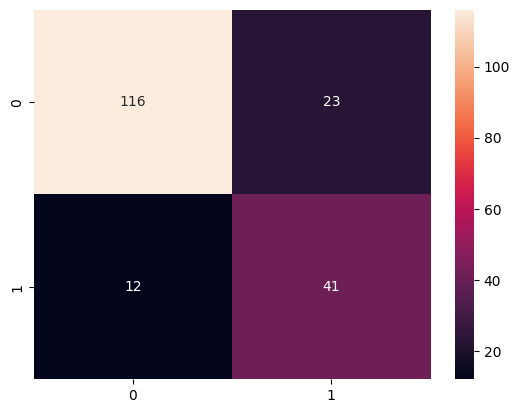

In [59]:
sns.heatmap(cnf_pred, annot=True, fmt="d")
plt.show()

## Support Vector Machine

In [60]:
from sklearn import svm

In [61]:
model1 = svm.SVC(kernel='linear')

In [62]:
#training the support vector Machine Classifier
model1.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
## Checking model score/ training accuracy 75
model1.score(X_train, y_train)

0.7569444444444444

In [64]:
## Predicting values 
y_pred1 = model1.predict(X_test)

In [65]:
y_pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [66]:
## Checking testing accuracy 81
accuracy_score(y_pred1, y_test)

0.8125

In [67]:
print(classification_report(y_pred1, y_test))


              precision    recall  f1-score   support

           0       0.90      0.83      0.86       138
           1       0.64      0.76      0.69        54

    accuracy                           0.81       192
   macro avg       0.77      0.80      0.78       192
weighted avg       0.83      0.81      0.82       192



In [68]:
cnf_pred1=confusion_matrix(y_pred1, y_test)
cnf_pred1

array([[115,  23],
       [ 13,  41]], dtype=int64)

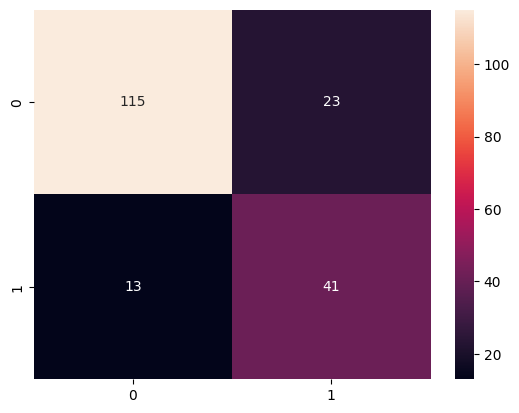

In [69]:
sns.heatmap(cnf_pred1, annot=True, fmt="d")
plt.show()

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Model Saving

In [71]:
# importing joblib
import joblib

In [72]:
joblib.dump(model, "Diabetes_Patients_prediction_joblib") 

['Diabetes_Patients_prediction_joblib']

## for model predict loading file

In [73]:
model_Lr = joblib.load("Diabetes_Patients_prediction_joblib")

In [74]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

Making a Predictive System

In [78]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3105756   1.43725962  0.13547286 -0.10368602  0.8262527  -0.78774305
   0.36400107  1.46707289]]
[1]
The person is diabetic
